# Lab Assignment Five: Wide and Deep Network Architectures

### Authors
- Juliana Antonio
- Xiaona Hang
- Chuanqi Deng


### 1. Preparation
#### 1.1 Pre-processing

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split


df_ad_extra = pd.read_csv('data/Ad_table (extra).csv')
# shuffle the data
df_ad_extra = df_ad_extra.sample(frac=1).reset_index(drop=True)

df_ad_extra.info()

df_ad_extra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Maker         268255 non-null  object 
 1    Genmodel     268255 non-null  object 
 2    Genmodel_ID  268255 non-null  object 
 3   Adv_ID        268255 non-null  object 
 4   Adv_year      268255 non-null  int64  
 5   Adv_month     268255 non-null  int64  
 6   Color         246380 non-null  object 
 7   Reg_year      268248 non-null  float64
 8   Bodytype      267301 non-null  object 
 9   Runned_Miles  267200 non-null  object 
 10  Engin_size    266191 non-null  object 
 11  Gearbox       268088 non-null  object 
 12  Fuel_type     267846 non-null  object 
 13  Price         267110 non-null  float64
 14  Engine_power  236444 non-null  float64
 15  Annual_Tax    221580 non-null  object 
 16  Wheelbase     240257 non-null  float64
 17  Height        240454 non-null  float64
 18  Widt

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Engine_power,Annual_Tax,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Peugeot,208,69_12,69_12$$1332,2021,3,Black,2019.0,Hatchback,5232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
1,Nissan,Qashqai,64_33,64_33$$696,2018,6,Silver,2007.0,Hatchback,92000,...,113.0,195,2630.0,1615.0,1780.0,4315.0,42.2 mpg,109 mph,5.0,5.0
2,Audi,A6 Avant,7_11,7_11$$291,2018,4,Grey,2012.0,Estate,84566,...,175.0,140,2912.0,1461.0,1874.0,4926.0,55.4 mpg,134 mph,5.0,5.0
3,Ford,Focus CC,29_16,29_16$$65,2018,8,Red,2007.0,Convertible,67000,...,143.0,250,2640.0,1448.0,1991.0,4509.0,37.7 mpg,130 mph,4.0,2.0
4,Ford,Mondeo,29_27,29_27$$479,2018,5,Silver,2015.0,Hatchback,59252,...,148.0,20,2850.0,1482.0,2121.0,4871.0,68.9 mpg,134 mph,5.0,5.0


In [2]:
data=deepcopy(df_ad_extra)
data.columns = data.columns.str.replace(' ', '')
# Remove columns that are not needed for the model
data.drop(['Genmodel_ID', 'Adv_ID', 'Annual_Tax'], axis=1, inplace=True)

# Convert Columns numeric data
data['Average_mpg'] = data['Average_mpg'].str.extract(r'(\d+\.\d+)').astype(float)
data['Top_speed'] = data['Top_speed'].str.extract(r'(\d+)').astype(float)
data['Engin_size'] = data['Engin_size'].str.extract(r'(\d+\.\d+)').astype(float)
data['Runned_Miles'] = pd.to_numeric(data['Runned_Miles'], errors='coerce')

# Fill categorical columns with the most frequent value (mode)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(
    data[categorical_cols].mode().iloc[0])

# Get the unique values in each categorical column
for col in categorical_cols:
    print(
        f'{col} has {len(data[col].unique())} unique values')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data.to_csv('data/Ad_table (extra) preprocessed.csv')

# Get numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].to_numpy().astype(float)

print("=====================================================")
print(f'Numerical columns: {numerical_cols}')
print(f'Categorical columns: {categorical_cols}')

Maker has 88 unique values
Genmodel has 896 unique values
Color has 22 unique values
Bodytype has 18 unique values
Gearbox has 3 unique values
Fuel_type has 13 unique values
Numerical columns: Index(['Adv_year', 'Adv_month', 'Reg_year', 'Runned_Miles', 'Engin_size',
       'Price', 'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length',
       'Average_mpg', 'Top_speed', 'Seat_num', 'Door_num'],
      dtype='object')
Categorical columns: Index(['Maker', 'Genmodel', 'Color', 'Bodytype', 'Gearbox', 'Fuel_type'], dtype='object')


In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216069 entries, 0 to 216068
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Maker         216069 non-null  object 
 1   Genmodel      216069 non-null  object 
 2   Adv_year      216069 non-null  float64
 3   Adv_month     216069 non-null  float64
 4   Color         216069 non-null  object 
 5   Reg_year      216069 non-null  float64
 6   Bodytype      216069 non-null  object 
 7   Runned_Miles  216069 non-null  float64
 8   Engin_size    216069 non-null  float64
 9   Gearbox       216069 non-null  object 
 10  Fuel_type     216069 non-null  object 
 11  Price         216069 non-null  float64
 12  Engine_power  216069 non-null  float64
 13  Wheelbase     216069 non-null  float64
 14  Height        216069 non-null  float64
 15  Width         216069 non-null  float64
 16  Length        216069 non-null  float64
 17  Average_mpg   216069 non-null  float64
 18  Top_

,Maker,Genmodel,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,...,Price,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Nissan,Qashqai,2018.0,6.0,Silver,2007.0,Hatchback,92000.0,1.6,Manual,...,3295.0,113.0,2630.0,1615.0,1780.0,4315.0,42.2,109.0,5.0,5.0
1,Audi,A6 Avant,2018.0,4.0,Grey,2012.0,Estate,84566.0,2.0,Automatic,...,12999.0,175.0,2912.0,1461.0,1874.0,4926.0,55.4,134.0,5.0,5.0
2,Ford,Focus CC,2018.0,8.0,Red,2007.0,Convertible,67000.0,2.0,Manual,...,1495.0,143.0,2640.0,1448.0,1991.0,4509.0,37.7,130.0,4.0,2.0
3,Ford,Mondeo,2018.0,5.0,Silver,2015.0,Hatchback,59252.0,2.0,Manual,...,10327.0,148.0,2850.0,1482.0,2121.0,4871.0,68.9,134.0,5.0,5.0
4,Land Rover,Freelander 2,2018.0,6.0,White,2013.0,SUV,60100.0,2.2,Manual,...,11980.0,150.0,2660.0,1740.0,2005.0,4500.0,45.6,112.0,5.0,5.0


#### <center> Data Descriptions </center>
    
|Feature | Data Type | Description  |
|-------|---------------|----------|
|Maker:| categorical | Automaker name |
|Genmodel:| categorical| Generic Model name|
|Adv_year:| discrete| Advertisement’s creation year|
|Adv_month:| 0-12 months, discrete |Advertisement’s creation month|
|color: | categorical| The color of the car|
|Reg_year: | discrete | This car’s first registration/selling year|
|Bodytype: | categorical| This car’s body type|
|Runned_miles: | continous | This car’s runned mileage|
|Engin_size: | continous | This car’s engine size|
|Gearbox: | Categorical | This car’s gearbox |
|Fuel_type: | categorical | This car’s fuel type |
|**Price**: | continous | This car’s selling price| 
|Engine_power: | continous | This car's enging power|
|Wheelbase: | continous | Horizontal distance between the centers of the front and rear wheels|
|Height: | continous | Height of the car|
|Width:  | continous | Width of the car|
|Length: | continous | Length of the car|
|Avg_mpg: | continous | Average miles per gallon |
|Top_speed: | continous | Highest speed car can reach |
|Seat_num: | discrete | This car’s seats number|
|Door_num: | discrete | This car's doors number|



----

##### Exploring Categorical Data

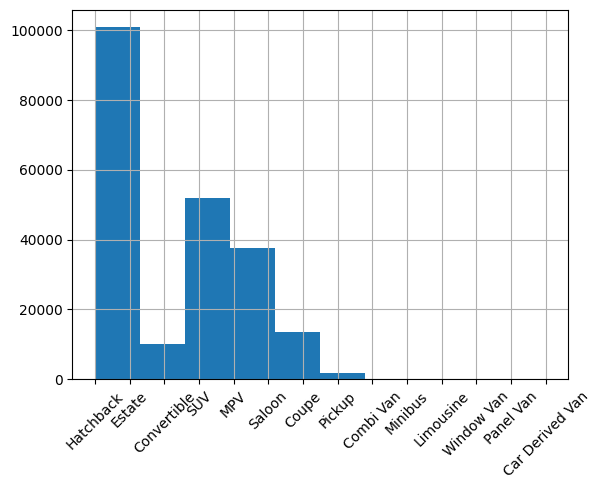

In [4]:
import matplotlib.pyplot as plt
data['Bodytype'].hist()
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()

Plotting the 'Bodytype' category, we see in this histogram that the Hatchback has the highest amount of instances, followed by the SUV and MPV. 

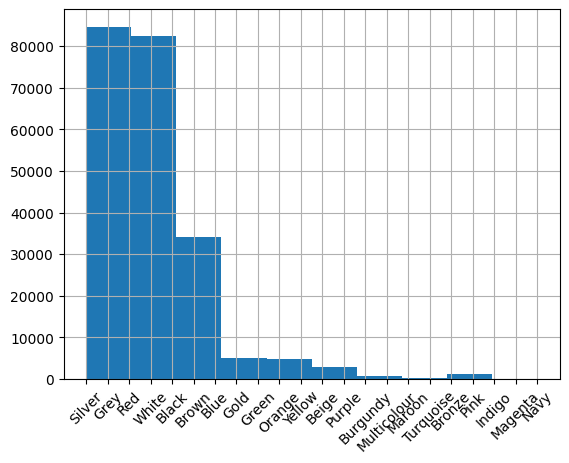

In [5]:
import matplotlib.pyplot as plt
data['Color'].hist()
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()

Plotting the category 'Color', we can see the most common color of car(s) is Blue, Silver, and Grey, followed by Black and White. 

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

cat_features = ['Maker', 'Genmodel', 'Color', 'Bodytype', 'Fuel_type', 'Gearbox']

# Scale continuous numeric values
num_features = ['Runned_Miles', 'Engin_size', 'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed']

for col in num_features:
    data[col] = data[col].astype(float)
    ss = StandardScaler()
    data[col] = ss.fit_transform(data[col].values.reshape(-1, 1))

# convert price to 3 category, 0: low, 1: medium, 2: high
data['Price'] = pd.qcut(data['Price'], 3, labels=range(3))
data.head()

,Maker,Genmodel,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,...,Price,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Nissan,Qashqai,2018.0,6.0,Silver,2007.0,Hatchback,0.971796,-0.394857,Manual,...,0,-0.439370,0.127304,0.550758,-0.755468,-0.099260,-0.635045,-0.713888,5.0,5.0
1,Audi,A6 Avant,2018.0,4.0,Grey,2012.0,Estate,0.797255,0.139912,Automatic,...,2,0.287262,0.746968,-0.491213,-0.138625,1.368284,0.331553,0.647063,5.0,5.0
2,Ford,Focus CC,2018.0,8.0,Red,2007.0,Convertible,0.384827,0.139912,Manual,...,0,-0.087774,0.149278,-0.579172,0.629148,0.366703,-0.964567,0.429311,4.0,2.0
3,Ford,Mondeo,2018.0,5.0,Silver,2015.0,Hatchback,0.202913,0.139912,Manual,...,1,-0.029174,0.610730,-0.349126,1.482230,1.236181,1.320119,0.647063,5.0,5.0
4,Land Rover,Freelander 2,2018.0,6.0,White,2013.0,SUV,0.222823,0.407296,Manual,...,1,-0.005735,0.193226,1.396514,0.721019,0.345086,-0.386073,-0.550574,5.0,5.0


The final dataset used for classification consists of data sourced from the publicly available dataset on Kaggle (https://www.kaggle.com/datasets/mexwell/dvm-car/data), aimed at facilitating business-related research and applications in the automotive industry. Specifically, the dataset includes information pertinent to car appearance design, consumer analytics, and sales modeling. We utilized the "Ad_table (extra).csv" file, which provides additional features to enrich the dataset for the purpose of training wide and deep neural networks.

The dataset comprises 21 features, categorized into three types: 6 categorical, 10 continuous, and 5 discrete variables as shown in the Data Description Table. To prepare the data for modeling, the continuous numeric values have been scaled using StandardScaler from sklearn.preprocessing. The features 'Runned_Miles', 'Engin_size', 'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', and 'Top_speed' have been scaled to have a mean of 0 and a standard deviation of 1.

To facilitate classification tasks, the target variable 'Price' has been preprocessed and converted into categorical data. It now consists of three categories:

0 representing low price,
1 representing medium price, and
2 representing high price.

The dataset contains a total of 216,069 instances after preprocessing, where 52186 instances (NaNs) were removed, providing a rich and diverse set of data points for training and evaluating classification models.

#### 1.2 Cross-Product

Crossing features such as 'Maker' and 'Bodytype' can uncover relationships between vehicle manufacturers and the body styles of their offerings, providing insights into pricing dynamics influenced by brand reputation and aesthetic preferences. This analysis is invaluable for automotive marketers seeking to understand consumer preferences and tailor marketing strategies accordingly.

Similarly, crossing 'Gearbox' with 'Fuel_type' can reveal interactions between transmission types and fuel preferences, reflecting performance characteristics and market segmentation. Understanding these interactions is crucial for automakers aiming to optimize product offerings and capitalize on market trends effectively.

Lastly, crossing 'Color' and 'Bodytype' offers valuable insights into consumer preferences for vehicle aesthetics and practical functionality. It unveils how certain colors resonate differently with distinct body types, indicative of evolving trends in styling preferences and regional nuances. This analysis aids automotive manufacturers in aligning their color offerings with market demands and tailoring design strategies to cater to diverse consumer preferences effectively.

However, crossing features with high amount of instances, such as 'Genmodel' with 698 unique instances, may introduce computational complexity and increase the risk of overfitting. Therefore, prioritizing cross-product combinations based on their relevance to the domain and balancing computational constraints is essential for effectively capturing interactions while mitigating the potential drawbacks of model complexity.

In [7]:
# Fill categorical columns with the most frequent value (mode)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(
    data[categorical_cols].mode().iloc[0])

# Get the unique values in each categorical column
for col in categorical_cols:
    print(
        f'{col} has {len(data[col].unique())} unique values')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


Maker has 60 unique values
Genmodel has 698 unique values
Color has 22 unique values
Bodytype has 14 unique values
Gearbox has 2 unique values
Fuel_type has 8 unique values


#### 1.3 Metric(s) to use to evaluate algorithm’s performance

For evaluating the algorithm's performance, we will primarily rely on the F1 score, which balances both precision and recall. In the context of classification tasks like predicting price categories (low, medium, high), F1 score is particularly suitable as it considers both false positives and false negatives. This is crucial in the automotive industry dataset, as misclassifying a vehicle's price could lead to significant financial implications for both buyers and sellers. By optimizing for F1 score, we ensure a balance between correctly identifying high-priced vehicles (minimizing missed opportunities) and avoiding misclassification errors (minimizing false alarms), thus enhancing the overall effectiveness and reliability of the model's predictions.

#### 1.4 Dividing Training and Testing Set

We will use shuffle splits to divide the data into training and testing sets for regression, as it ensures random sampling without requiring stratification. This method is appropriate for regression tasks because it provides unbiased estimates of model performance by repeatedly shuffling and splitting the data. It mirrors real-world scenarios where models need to generalize well to unseen data, making it a practical choice for evaluating model performance.

In [8]:
from sklearn.model_selection import ShuffleSplit
from keras.utils import to_categorical

num_classes = 3
y = data['Price']
X = data.drop(columns=['Price'])  

n_splits = 5
# Initialize shuffle splitter
shuffle_splitter = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Iterate over shuffle splits
for fold, (train_index, test_index) in enumerate(shuffle_splitter.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"Fold {fold+1} - Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Fold 1 - Train Shape: (172855, 20), Test Shape: (43214, 20)
Fold 2 - Train Shape: (172855, 20), Test Shape: (43214, 20)
Fold 3 - Train Shape: (172855, 20), Test Shape: (43214, 20)
Fold 4 - Train Shape: (172855, 20), Test Shape: (43214, 20)
Fold 5 - Train Shape: (172855, 20), Test Shape: (43214, 20)


In [9]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [10]:

import sys

try:
    from sklearn import metrics as mt
    import tensorflow as tf
    from tensorflow import keras

    # Print the versions of TensorFlow, Keras, and Python
    print(f'TensorFlow version: {tf.__version__}')
    # print(f'Keras version: {keras.__version__}')
    print(f'Python version: {sys.version}')

except ImportError as e:
    print(f'Error importing libraries: {e}')
    print('Make sure you have the necessary packages installed (tensorflow, sklearn, etc.)')

except Exception as e:
    print(f'An error occurred: {e}')

TensorFlow version: 2.13.0
Python version: 3.11.5 | packaged by conda-forge | (main, Aug 27 2023, 03:23:48) [MSC v.1936 64 bit (AMD64)]


In [11]:
# Create a tensorflow dataset, for ease of use later
df_train, df_test = train_test_split(data, test_size=0.2)
batch_size = 2048

def create_dataset_from_dataframe(df_input):
    
    labels = df_input['Price']
    df = df_input.copy().drop(columns=['Price'])  

    df = {key: value.values[:, np.newaxis] for key, value in df.items()}
    
    # create a tf.data.Dataset object
    ds = tf.data.Dataset.from_tensor_slices((dict(df), to_categorical(labels)))
    #ds = tf.data.Dataset.from_tensor_slices((dict(df), (labels)))
 
    # enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

ds_train = create_dataset_from_dataframe(df_train)
ds_test = create_dataset_from_dataframe(df_test)

In [12]:

# FeatureSpace to make data discrete and normalization


from keras.utils import FeatureSpace

# lump everything together, and concatenate
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "Maker": FeatureSpace.string_categorical(num_oov_indices=16),
        "Genmodel": FeatureSpace.string_categorical(num_oov_indices=32),
        "Color": FeatureSpace.string_categorical(num_oov_indices=0),
        "Bodytype": FeatureSpace.string_categorical(num_oov_indices=0),
        "Gearbox": FeatureSpace.string_categorical(num_oov_indices=0),
        "Fuel_type": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numerical features to make discrete, make into integer with max val
        "Adv_year": FeatureSpace.float_discretized(num_bins=10),
        "Adv_month": FeatureSpace.float_discretized(num_bins=12),
        "Reg_year": FeatureSpace.float_discretized(num_bins=10),
        "Seat_num": FeatureSpace.float_discretized(num_bins=10),
        "Door_num": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "Runned_Miles": FeatureSpace.float_normalized(),
        "Engin_size": FeatureSpace.float_normalized(),
        "Engine_power": FeatureSpace.float_normalized(),
        "Wheelbase": FeatureSpace.float_normalized(),
        "Height": FeatureSpace.float_normalized(),
        "Width": FeatureSpace.float_normalized(),
        "Length": FeatureSpace.float_normalized(),
        "Average_mpg": FeatureSpace.float_normalized(),
        "Top_speed": FeatureSpace.float_normalized(),
    },
# Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(feature_names=('Maker', 'Bodytype'), crossing_dim= 60 * 14),
        FeatureSpace.cross(feature_names=('Fuel_type', 'Gearbox'), crossing_dim= 2 * 8),
        FeatureSpace.cross(feature_names=('Color', 'Bodytype'), crossing_dim= 22 * 14),
    ],
    output_mode="concat", # can also be a dict, processed internally
)


# Run on the data
# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
# the adapt function allows the model to learn one-hot encoding sizes
feature_space.adapt(train_ds_with_no_labels) # inititalize the feature map to this data


# now define a preprocessing operation that returns the processed features
preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y), 
                                     num_parallel_calls=tf.data.AUTOTUNE)
# run it so that we can use the pre-processed data
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

# Run on the test set
preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [13]:
# Embedding for each categorical column
from tensorflow.keras.layers import Embedding, Flatten


def setup_embedding_from_categorical(feature_space, col_name):
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    x = feature_space.preprocessors[col_name].output

    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1, name=col_name+'_embed')(x)

    x = Flatten()(x)  # get rid of that extra dimension (for time of embedding)

    return x  # return the tensor here

In [14]:
# Embedding for the cross columns

def setup_embedding_from_crossing(feature_space, col_name):
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output

    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1, name=col_name+'_embed')(x)

    x = Flatten()(x)  # get rid of that extra dimension (for time of embedding)

    return x



##### Generate the wide branch, deep branch and final branch

In [15]:
# need to use unprocessed features here, to gain access to each output
dict_inputs = feature_space.get_inputs()

# store the output of the crossed columns
crossed_outputs = [] 
# for each crossed variable, embed it
for col in feature_space.crossers.keys():

    x = setup_embedding_from_crossing(feature_space, col)

    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    
# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)


# store the output of deep branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after normalization
for idx, col in enumerate(num_features):
    x = feature_space.preprocessors[col].output
    x = tf.cast(x, float)  # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable, embed it
for col in cat_features:
    x = setup_embedding_from_categorical(feature_space, col)
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)

# merge the deep branches together

deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)

# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])

### 2 Modeling
#### 2.1 Wide and Deep Networks

In [54]:
from keras.layers import  Dense, Concatenate
from keras.models import Model

encoded_features = feature_space.get_encoded_features() # these features have been encoded

def get_model(wide_branch_units, deep_branch_layers, activation):
    """return a model based on wide_branch_units and deep_branch_layers."""
    wide_branch = Dense(units=wide_branch_units, activation=activation, name='wide_branch')(encoded_features)
    
    deep_branch_strarting_units = 2 ** (deep_branch_layers+1) # last layer's units is 4
    deep_branch = Dense(units=deep_branch_strarting_units,activation=activation, name='deep_branch_0')(encoded_features)
    for i in range(deep_branch_layers - 1):
        deep_branch_strarting_units //= 2
        deep_branch = Dense(units=deep_branch_strarting_units,activation=activation, name=f'deep_branch_{(i+1)}')(deep_branch)
    final_branch = Concatenate(name='concat_deep_wide')([wide_branch, deep_branch])
    final_branch = Dense(num_classes, 'softmax')(final_branch)
    model = Model(inputs=encoded_features, outputs=final_branch)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "F1Score"])
    return model

# get 3 different models with different wide and deep layers and activation functions.
models = [get_model(32, 3, 'tanh'),
          get_model(64, 5, 'relu'),
          get_model(96, 7, 'gelu')]

In [55]:
from IPython.display import clear_output

# train the models
num_epoch = 5
for model in models:
    clear_output(wait=True)
    model.fit(preprocessed_ds_train, validation_data=preprocessed_ds_test, epochs=num_epoch, verbose=1)

Epoch 1/5
85/85 [==============================] - 4s 38ms/step - loss: 0.4807 - accuracy: 0.8165 - f1_score: 0.8148 - val_loss: 0.2053 - val_accuracy: 0.9172 - val_f1_score: 0.9165
Epoch 2/5
85/85 [==============================] - 3s 36ms/step - loss: 0.1927 - accuracy: 0.9187 - f1_score: 0.9188 - val_loss: 0.1793 - val_accuracy: 0.9269 - val_f1_score: 0.9267
Epoch 3/5
85/85 [==============================] - 3s 35ms/step - loss: 0.1793 - accuracy: 0.9243 - f1_score: 0.9244 - val_loss: 0.1736 - val_accuracy: 0.9285 - val_f1_score: 0.9282
Epoch 4/5
85/85 [==============================] - 3s 35ms/step - loss: 0.1741 - accuracy: 0.9267 - f1_score: 0.9268 - val_loss: 0.1703 - val_accuracy: 0.9292 - val_f1_score: 0.9290
Epoch 5/5
85/85 [==============================] - 3s 35ms/step - loss: 0.1705 - accuracy: 0.9283 - f1_score: 0.9284 - val_loss: 0.1682 - val_accuracy: 0.9304 - val_f1_score: 0.9302


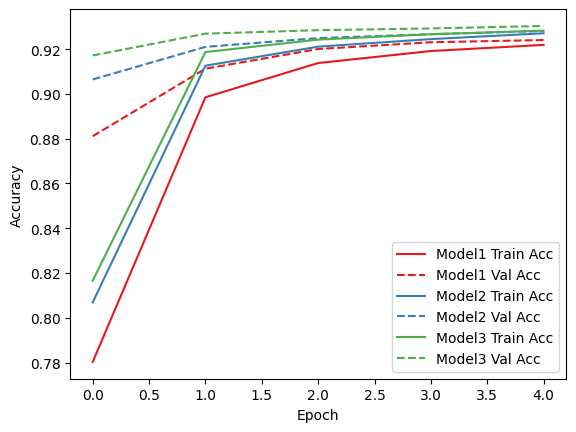

In [56]:
# plot the performance of the networks
import matplotlib.pyplot as plt
cm =  plt.get_cmap('Set1')
for i, model in enumerate(models):
    plt.plot(model.history.history['accuracy'], label = f"Model{i+1} Train Acc", color= cm(i))
    plt.plot(model.history.history['val_accuracy'], label = f"Model{i+1} Val Acc", color = cm(i), linestyle = '--')
    #'loss', 'val_loss', 'val_accuracy'

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

#### 2.2 Generalization Performance

In [57]:
# prepare cross validation datasets
def create_dataset_from_dataframe(df_input, labels):
    """Create tensorflow Dataset"""
    df = df_input.copy()
    df = {key: value.values[:, np.newaxis] for key, value in df.items()}
    
    # create a tf.data.Dataset object
    ds = tf.data.Dataset.from_tensor_slices((df, to_categorical(labels)))
 
    # enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds


# create folds and data after applying feature_space
ds_cross_val = []
for fold, (train_index, test_index) in enumerate(shuffle_splitter.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ds_train = create_dataset_from_dataframe(X_train, y_train)
    ds_test = create_dataset_from_dataframe(X_test, y_test)
    
    # now define a preprocessing operation that returns the processed features
    preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y), 
                                        num_parallel_calls=tf.data.AUTOTUNE)
    # run it so that we can use the pre-processed data
    preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

    # Run on the test set
    preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)
    
    ds_cross_val.append((preprocessed_ds_train, preprocessed_ds_test))

In [58]:
# train and evaluate models with different depth
from tqdm.notebook import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

result = []
num_epoch = 5
models_paras = [[32, 'tanh'], [64, 'relu']]
deep_layers = range(3, 10, 3)
progress = tqdm(total=(len(models_paras) * len(deep_layers) * len(ds_cross_val)))
abort = False

def train_and_evaluate(preprocessed_ds_train, preprocessed_ds_test, model_i, models_para):
    """Create, train, and evaluate model"""
    if abort:
        return None
    model = get_model(*models_para)
    model.fit(preprocessed_ds_train, epochs=num_epoch, verbose=0)
    if abort:
        return None
    ret = model.evaluate(preprocessed_ds_test, verbose=0)
    return [f"model_{model_i+1}({models_para[0]}, {models_para[2]})", models_para[1], *ret]

# train in parallel
tasks = []
with ThreadPoolExecutor(4) as tpx:
    for model_i, models_para in enumerate(models_paras):
        for num_deep_layer in deep_layers:
            for preprocessed_ds_train, preprocessed_ds_test in ds_cross_val:
                full_models_para = [models_para[0], num_deep_layer ,models_para[1]]
                tasks.append(tpx.submit(train_and_evaluate, preprocessed_ds_train, preprocessed_ds_test, model_i, full_models_para))
    try:
        for future in as_completed(tasks):
            result.append(future.result())
            progress.update()
    except:
        abort = True
        print("Aborting...")

  0%|          | 0/30 [00:00<?, ?it/s]

In [61]:
metrics_df = pd.DataFrame(result, columns=["Model(wide_units, activation)", "Deep Branch Layers", "Loss", "Accuracy", "F1 Score" ])
# Split the 'F1 Score' column into three separate columns
metrics_df[['F1 Score 1', 'F1 Score 2', 'F1 Score 3']] = pd.DataFrame(metrics_df['F1 Score'].apply(pd.Series))
# Drop the original 'F1 Score' column
metrics_df.drop(columns=['F1 Score'], inplace=True)

In [62]:
# display the evaluation results
from IPython.display import display
grouped_metrics_df_mean = metrics_df.groupby(['Model(wide_units, activation)', "Deep Branch Layers"]).mean().reset_index()
grouped_metrics_df_median = metrics_df.groupby(['Model(wide_units, activation)', "Deep Branch Layers"]).median().reset_index()
grouped_metrics_df_min = metrics_df.groupby(['Model(wide_units, activation)', "Deep Branch Layers"]).min().reset_index()
grouped_metrics_df_max = metrics_df.groupby(['Model(wide_units, activation)', "Deep Branch Layers"]).max().reset_index()

print("Mean 5-fold cross validation result")
display(grouped_metrics_df_mean)

print("Median 5-fold cross validation result")
display(grouped_metrics_df_median)

print("Min 5-fold cross validation result")
display(grouped_metrics_df_min)

print("Max 5-fold cross validation result")
display(grouped_metrics_df_max)

Mean 5-fold cross validation result


,"Model(wide_units, activation)",Deep Branch Layers,Loss,Accuracy,F1 Score 1,F1 Score 2,F1 Score 3
0,"model_1(32, tanh)",3,0.193565,0.920692,0.937486,0.881202,0.943306
1,"model_1(32, tanh)",6,0.187660,0.923104,0.937528,0.884567,0.946959
2,"model_1(32, tanh)",9,0.187966,0.922854,0.938521,0.883726,0.945745
3,"model_2(64, relu)",3,0.178050,0.925265,0.939926,0.887800,0.947887
4,"model_2(64, relu)",6,0.171696,0.927880,0.941725,0.891379,0.950224
5,"model_2(64, relu)",9,0.169447,0.929981,0.943375,0.894392,0.951817


Median 5-fold cross validation result


,"Model(wide_units, activation)",Deep Branch Layers,Loss,Accuracy,F1 Score 1,F1 Score 2,F1 Score 3
0,"model_1(32, tanh)",3,0.193820,0.920350,0.936576,0.879762,0.943368
1,"model_1(32, tanh)",6,0.187920,0.922756,0.937099,0.884192,0.946302
2,"model_1(32, tanh)",9,0.188332,0.923081,0.937391,0.885543,0.947024
3,"model_2(64, relu)",3,0.178676,0.924793,0.939550,0.886809,0.947971
4,"model_2(64, relu)",6,0.172237,0.928056,0.941371,0.891426,0.950412
5,"model_2(64, relu)",9,0.169330,0.930185,0.943756,0.894513,0.951450


Min 5-fold cross validation result


,"Model(wide_units, activation)",Deep Branch Layers,Loss,Accuracy,F1 Score 1,F1 Score 2,F1 Score 3
0,"model_1(32, tanh)",3,0.189598,0.918545,0.935128,0.878576,0.940778
1,"model_1(32, tanh)",6,0.181817,0.920581,0.930899,0.880045,0.945470
2,"model_1(32, tanh)",9,0.182368,0.918290,0.936386,0.876239,0.941417
3,"model_2(64, relu)",3,0.173857,0.923775,0.936400,0.884706,0.946109
4,"model_2(64, relu)",6,0.166142,0.924955,0.938685,0.887695,0.948474
5,"model_2(64, relu)",9,0.168012,0.927917,0.939356,0.892344,0.951142


Max 5-fold cross validation result


,"Model(wide_units, activation)",Deep Branch Layers,Loss,Accuracy,F1 Score 1,F1 Score 2,F1 Score 3
0,"model_1(32, tanh)",3,0.198968,0.923057,0.940943,0.884589,0.944834
1,"model_1(32, tanh)",6,0.191818,0.925140,0.942100,0.888028,0.950340
2,"model_1(32, tanh)",9,0.194419,0.926852,0.943298,0.888826,0.950137
3,"model_2(64, relu)",3,0.180382,0.928033,0.944148,0.891554,0.948852
4,"model_2(64, relu)",6,0.175210,0.931226,0.946330,0.895537,0.951384
5,"model_2(64, relu)",9,0.172135,0.931388,0.946307,0.896279,0.953434


The above reuslt is from 5-fold cross validation after mean, median, min, and max. Accoding to the result, deeper models have a better performance on all the metrics. From the mean and median results, the best model is model_2 with 9 layers in the deep branch. The metrics has demonstrated its superiority over other models.

#### 2.3 Compare a standard MLP to the Wide and Deep Network with best performance

# 3. Exceptional Work 
- Capture the embedding weights from the deep network
- If needed, perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results.
- Visualize and explain any clusters in the data.


Build a training model using embedding branches

In [25]:
from keras.utils import FeatureSpace

cat_features = ['Maker', 'Genmodel', 'Color',
                'Bodytype', 'Gearbox', 'Fuel_type']
                
    
# Scale continuous numeric values
num_features = [ 'Runned_Miles', 'Engin_size', 'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed']

# Create a tensorflow dataset, for ease of use later
df_train, df_test = train_test_split(data, test_size=0.2)
batch_size = 1024

# def create_dataset_from_dataframe(df_input):
#     df = df_input.copy()
#     labels = df['Price']

#     df = {key: value.values[:, np.newaxis]
#           for key, value in df_input[cat_features+num_features].items()}

#     # create a tf.data.Dataset object
#     ds = tf.data.Dataset.from_tensor_slices((dict(df), to_categorical(labels)))

#     # enable batching and prefetching
#     ds = ds.batch(batch_size)
#     ds = ds.prefetch(batch_size)

#     return ds

def create_dataset_from_dataframe(df_input):
    labels = df_input['Price']
    df = df_input.copy().drop(columns=['Price'])  

    df = {key: value.values[:, np.newaxis] for key, value in df.items()}
    
    # create a tf.data.Dataset object
    ds = tf.data.Dataset.from_tensor_slices((dict(df), to_categorical(labels)))
 
    # enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

ds_train = create_dataset_from_dataframe(df_train)
ds_test = create_dataset_from_dataframe(df_test)

In [27]:
from tensorflow.keras.utils import FeatureSpace

crossing_dim1 = len(df_train['Maker'].unique()) * len(df_train['Bodytype'].unique())
crossing_dim2 = len(df_train['Fuel_type'].unique()) * len(df_train['Gearbox'].unique())
crossing_dim3 = len(df_train['Color'].unique()) * len(df_train['Bodytype'].unique())

feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "Maker": FeatureSpace.string_categorical(num_oov_indices=0, output_mode='int'),
        "Genmodel": FeatureSpace.string_categorical(num_oov_indices=32, output_mode='int'),
        "Color": FeatureSpace.string_categorical(num_oov_indices=0, output_mode='int'),
        "Bodytype": FeatureSpace.string_categorical(num_oov_indices=0, output_mode='int'),
        "Gearbox": FeatureSpace.string_categorical(num_oov_indices=0, output_mode='int'),
        "Fuel_type": FeatureSpace.string_categorical(num_oov_indices=0, output_mode='int'),

        # Numerical features to make discrete, make into integer with max val
        "Adv_year": FeatureSpace.float_discretized(num_bins=10),
        "Adv_month": FeatureSpace.float_discretized(num_bins=12),
        "Reg_year": FeatureSpace.float_discretized(num_bins=10),
        "Seat_num": FeatureSpace.float_discretized(num_bins=10),
        "Door_num": FeatureSpace.float_discretized(num_bins=10),

        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "Runned_Miles": FeatureSpace.float_normalized(),
        "Engin_size": FeatureSpace.float_normalized(),
        "Engine_power": FeatureSpace.float_normalized(),
        "Wheelbase": FeatureSpace.float_normalized(),
        "Height": FeatureSpace.float_normalized(),
        "Width": FeatureSpace.float_normalized(),
        "Length": FeatureSpace.float_normalized(),
        "Average_mpg": FeatureSpace.float_normalized(),
        "Top_speed": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(feature_names=('Maker', 'Bodytype'), crossing_dim=crossing_dim1, output_mode='int'),
        FeatureSpace.cross(feature_names=('Fuel_type', 'Gearbox'), crossing_dim=crossing_dim2, output_mode='int'),
        FeatureSpace.cross(feature_names=('Color', 'Bodytype'), crossing_dim=crossing_dim3, output_mode='int'),
    ],
    output_mode="dict",  # can also be a dict, processed internally
)

#run on the data
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)


# now define a preprocessing operation that returns the processed features
preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y),
                                     num_parallel_calls=tf.data.AUTOTUNE)

preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

# Run on the test set
preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [28]:
# need to use unprocessed features here, to gain access to each output
dict_inputs = feature_space.get_inputs()

# these features have been encoded
#encoded_features = feature_space.get_encoded_features()

crossed_outputs = []
# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():
    x = setup_embedding_from_crossing(feature_space, col)
    crossed_outputs.append(x)
# for col in feature_space.crossers.keys():
#     x = setup_embedding_from_crossing(encoded_features, col)
#     crossed_outputs.append(x)


wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# store the output of deep branch
all_deep_branch_outputs = []
input_deep_dim = 0
# for each numeric variable, just add it in after embedding
for col in num_features:
    #x = encoded_features[col]
    x = feature_space.preprocessors[col].output
    x = tf.cast(x,float) # cast an integer as a float here
    input_deep_dim += x.shape[1]
    all_deep_branch_outputs.append(x)

# for each categorical variable, embed it
for col in cat_features:
    x = setup_embedding_from_categorical(feature_space, col)
    input_deep_dim += x.shape[1]
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=input_deep_dim, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep3')(deep_branch)

# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=num_classes, activation='softmax',
                     name='combined')(final_branch)

# encoded features input, fast
training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model.summary()

# # non-encoded, perform redundant operations
# inference_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
# inference_model.compile(loss="binary_crossentropy", metrics=["accuracy"])


# plot_model(
#     training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Maker (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 Genmodel (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 Color (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 Bodytype (InputLayer)       [(None, 1)]                  0         []                            
                                                                                            

In [29]:
# store the output of the crossed columns
crossed_outputs = []
# for each crossed variable, embed it
for col in feature_space.crossers.keys():

    x = setup_embedding_from_crossing(feature_space, col)

    # save these outputs in list to concatenate later
    crossed_outputs.append(x)

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)


# store the output of deep branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after normalization
for idx, col in enumerate(num_features):
    x = feature_space.preprocessors[col].output
    # x = tf.cast(x, float)  # cast an integer as a float here
    all_deep_branch_outputs.append(x)

# for each categorical variable, embed it
for col in cat_features:
    x = setup_embedding_from_categorical(feature_space, col)
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)

# merge the deep branches together

deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)

# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep3')(deep_branch)

# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1, activation='sigmoid',
                     name='combined')(final_branch)

# encoded features input, fast
training_model = keras.Model(inputs=encoded_features, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

training_model.summary()

ValueError: Found input tensor cannot be reached given provided output tensors. Please make sure the tensor KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='Runned_Miles'), name='Runned_Miles', description="created by layer 'Runned_Miles'") is included in the model inputs when building functional model.

In [ ]:
# Train the model
history = training_model.fit(ds_train, validation_data=ds_test, epochs=5, verbose=2)

In [ ]:
print("Has the model been trained?", hasattr(training_model, 'history'))

In [ ]:
print(training_model.layers)

In [ ]:
# Retieve the embeddings layers
import numpy as np
embed_layers = [
    layer for layer in training_model.layers if 'embed' in layer.name]

# Extract their weights
embed_weights = {layer.name: layer.get_weights()[0] for layer in embed_layers}

# save the weights
for name, weights in embed_weights.items():
    np.save(f'{name}_weights.npy', weights)
    
# print out the weights
for name, weights in embed_weights.items():
    print(f'{name}: {weights.shape}')

## References

1.) https://www.kaggle.com/datasets/mexwell/dvm-car/data

2.) https://keras.io/api/metrics/classification_metrics/#f1score-class